In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

torch.manual_seed(1)

import matplotlib.pyplot as plt
%matplotlib inline

# What is a Linear regression
- 선형회귀는 종속변수 y와 한 개 이상의 독립 변수 x와의 선형 관계를 모델링하는 회귀분석 기법임.

- $y=X\beta+ \alpha$

<img src='./images/linear_regression.png' width=300 align=left>

### 1. 데이터 생성

<x shape> : torch.Size([100, 1])
<y shape> : torch.Size([100, 1])


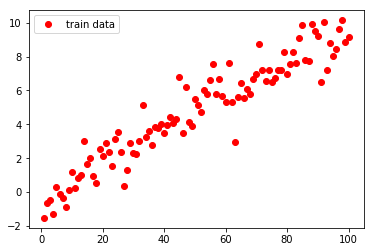

In [2]:
x= torch.arange(1, 101)
x= x.unsqueeze(1)
print('<x shape> :', x.shape)

y= torch.linspace(0,10,100)+ torch.randn(100)
y= y.unsqueeze(1)
print('<y shape> :',y.shape)
plt.plot(x.numpy(), y.numpy(), 'ro', label='train data')
plt.legend()
plt.show()

###  2. 모델링

In [3]:
model= nn.Linear(1,1)
print([p for p in model.named_parameters()])

[('weight', Parameter containing:
tensor([[ 0.7244]])), ('bias', Parameter containing:
tensor([ 0.6212]))]


### 3. 로스함수
- 선형회귀에서는 주로 Mean Squared error를 많이 사용함.  
- $ MSE= \frac{1}{n}\sum_{i=1}^{n}(Y-\hat{Y})$

In [4]:
loss_function= nn.MSELoss()

#### 4. 학습
- 학습을 통해서 좋은 모델을 찾는 과정.
- parameter를 업데이트해 loss값을 줄여나가는 과정
- parametef를 업데이트할 때 gradient descent를 주로 사용함  
$$ \theta \leftarrow \theta - \alpha * \frac{\operatorname{d} loss}{\operatorname{d}\theta} \theta$$

In [5]:
EPOCH= 6
learning_rate= 0.0001

[0 / 6] loss : 1376


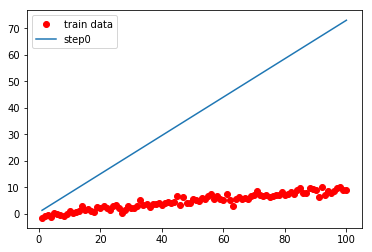

[1 / 6] loss : 145


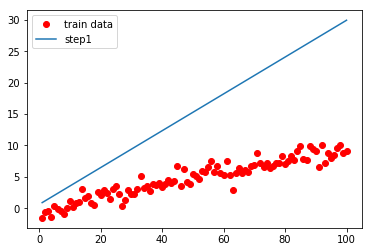

[2 / 6] loss :  16


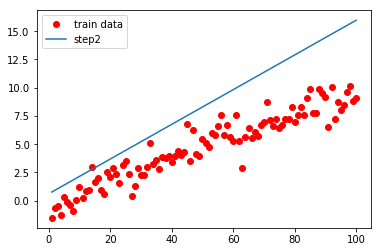

[3 / 6] loss :   3


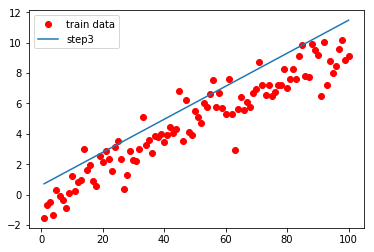

[4 / 6] loss :   1


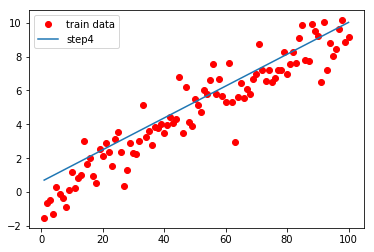

[5 / 6] loss :   1


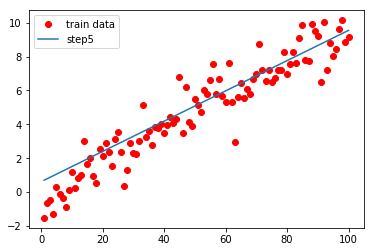

In [6]:
for epoch in range(EPOCH):
    model.zero_grad() # grad값을 초기화
    pred= model(x)
    loss= loss_function(pred, y)
    
    print("[%d / %d] loss : %3.f" % (epoch, EPOCH, loss))
    plt.plot(x.numpy(), y.numpy(), 'ro', label='train data')
    plt.plot(x.data.numpy(), pred.data.numpy(), label='step'+str(epoch))
    plt.legend()
    plt.show()
    
    # gradient descent
    loss.backward()
    for param in model.parameters():
        param.data -= learning_rate*param.grad.data # gradient descent
    

#### optimizer 사용

In [7]:
model= nn.Linear(1,1)
learning_rate= 0.0001
optimizer= optim.SGD(model.parameters(), lr=learning_rate)

[0 / 6] loss : 2336


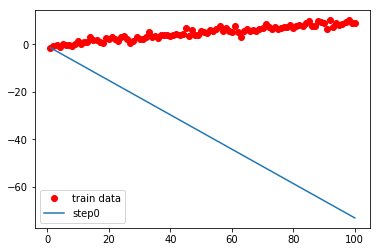

[1 / 6] loss : 245


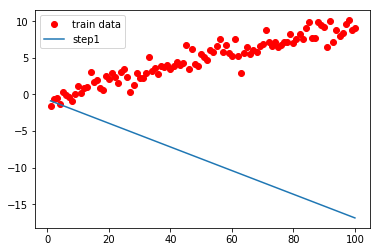

[2 / 6] loss :  26


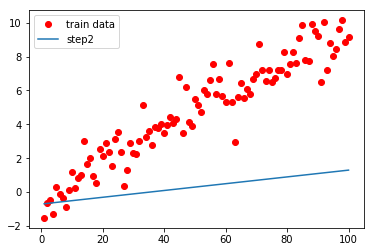

[3 / 6] loss :   4


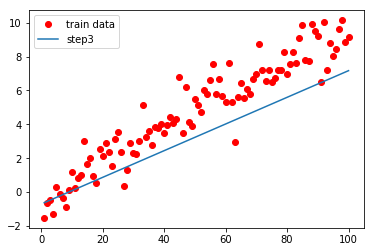

[4 / 6] loss :   1


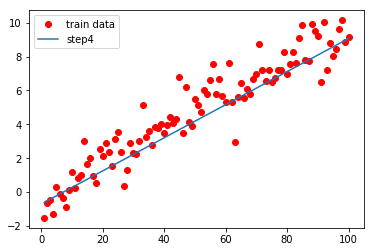

[5 / 6] loss :   1


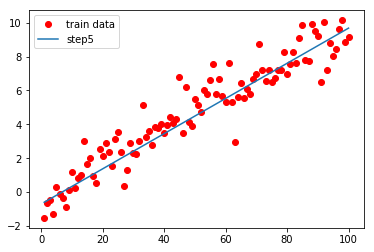

In [8]:
EPOCH= 6

for epoch in range(EPOCH):
    model.zero_grad() # grad값을 초기화
    pred= model(x)
    loss= loss_function(pred, y)
    
    print("[%d / %d] loss : %3.f" % (epoch, EPOCH, loss))
    plt.plot(x.numpy(), y.numpy(), 'ro', label='train data')
    plt.plot(x.data.numpy(), pred.data.numpy(), label='step'+str(epoch))
    plt.legend()
    plt.show()
    
#     # gradient descent
    loss.backward()
    optimizer.step()
#     for param in model.parameters():
#         param.data -= learning_rate*param.grad.data # gradient descent
